In [1]:
import duckdb
import pandas as pd
import plotly.express as px
from plotly_calplot import calplot

from common.env_variables import DUCKDB_DWH_FILE

In [2]:
def display_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, "expand_frame_repr", False,
                           "display.float_format", '${:,.2f}'.format):
        display(df.fillna('.'))

In [3]:
conn = duckdb.connect(DUCKDB_DWH_FILE, read_only=True)

In [4]:
df = conn.execute(f'''
SELECT *
FROM count_job_online_by_date
;
''').df()

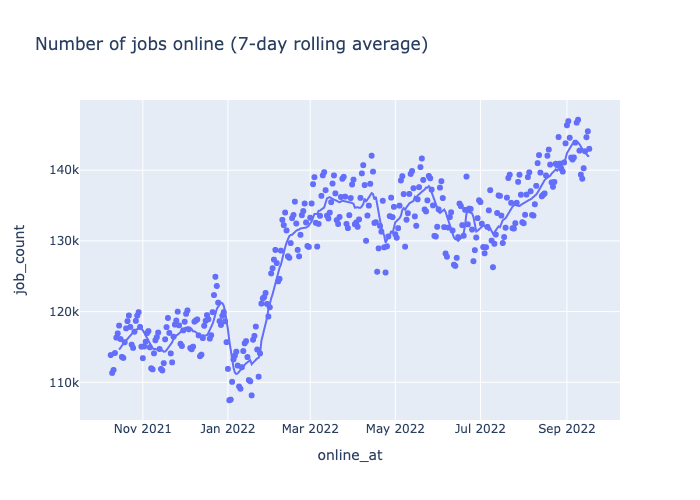

In [5]:
fig = px.scatter(df, x='online_at', y='job_count', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [6]:
df = conn.execute(f'''
SELECT *
FROM job_online_by_date_change
;
''').df()

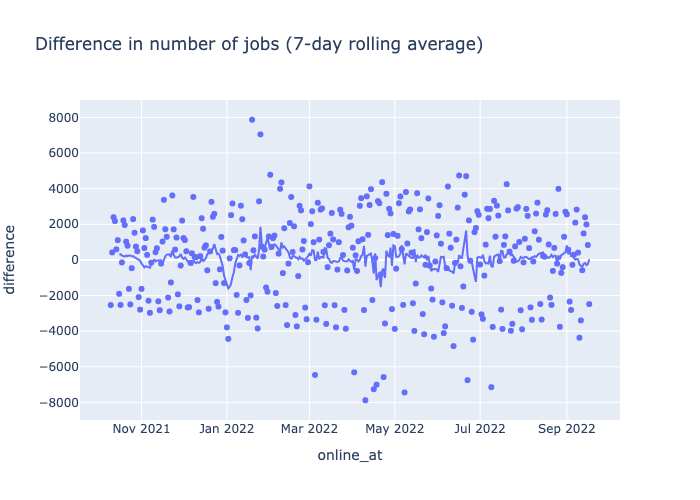

In [7]:

fig = px.scatter(df, x='online_at', y='difference', trendline='rolling', trendline_options=dict(window=7),
                 title='Difference in number of jobs (7-day rolling average)')
fig.show('png')

In [8]:
min_difference = df['difference'].min()
df['difference'] = df['difference'] - min_difference
print(df['difference'].min())

0


In [9]:
idx = pd.date_range('2021-01-01', '2022-12-31')
df = df.set_index('online_at')
df = df.reindex(idx, fill_value=-min_difference)
df = df.reset_index()
df = df.rename(columns={'index': 'online_at'})

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/Users/carrion/PycharmProjects/job-market-analytics/python/simplescraper/venv/lib/python3.10/site-packages/plotly_calplot/date_extractors.py:16: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



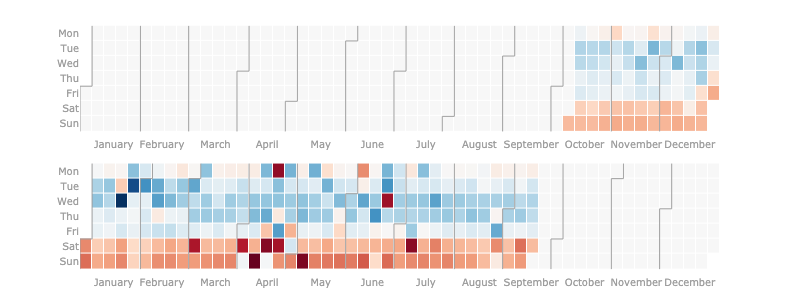

In [10]:
fig = calplot(
    df,
    x='online_at',
    y='difference',
    colorscale='RdBu'
)
fig.show('png')

In [11]:
df = conn.execute(f'''
SELECT * FROM top_location
''').df()
display_df(df)

,location,job_count
0,Berlin,96175
1,Hamburg,86889
2,München,83842
3,Frankfurt am Main,53969
4,Stuttgart,43836
5,Köln,43260
6,Düsseldorf,41757
7,Hannover,21331
8,Nürnberg,18330
9,Leipzig,16031


In [12]:
df = conn.execute(f'''
SELECT * FROM top_company;
''').df()
display_df(df)

,company,job_count
0,Deutsche Bahn AG,13181
1,Bosch Gruppe,8900
2,HAPEKO Hanseatisches Personalkontor GmbH,5704
3,Bertrandt AG,5693
4,meinestadt.de,5063
5,Mercedes - Benz AG,4917
6,StepStone GmbH,4836
7,ZEISS,4820
8,Korian Deutschland AG,3702
9,FERCHAU GmbH,3371


In [13]:
conn.close()